# Wstęp do Uczenia Maszynowego - Projekt I
## Etap: Pierwszy Kamień Milowy 
### Autorzy: Krzysztof Osiński, Jakub Miszczak

## Import packages

In [2]:
import pandas as pd
import numpy as np
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')
np.random.seed(23)
import zipfile

# Fraud Detection Transactions Dataset - EDA

In [3]:
zip_path = "fraud-detection-transactions-dataset.zip"

with zipfile.ZipFile(zip_path, 'r') as z:
    with z.open("synthetic_fraud_dataset.csv") as file:
        df = pd.read_csv(file)

## Columns description

Transaction_ID  -  Unique identifier for each transaction

User_ID	 -  Unique identifier for the user

Transaction_Amount  -  Amount of money involved in the transaction

Transaction_Type  -  Type of transaction (Online, In-Store, ATM, etc.)

Timestamp  -  Date and time of the transaction

Account_Balance	 -  User's current account balance before the transaction

Device_Type  -  Type of device used (Mobile, Desktop, etc.)

Location  -  Geographical location of the transaction

Merchant_Category  -  Type of merchant (Retail, Food, Travel, etc.)

IP_Address_Flag  -  Whether the IP address was flagged as suspicious (0 or 1)

Previous_Fraudulent_Activity  -  Number of past fraudulent activities by the user

Daily_Transaction_Count  -  Number of transactions made by the user that day

Avg_Transaction_Amount_7d  -  User's average transaction amount in the past 7 days

Failed_Transaction_Count_7d  -  Count of failed transactions in the past 7 days

Card_Type  -  Type of payment card used (Credit, Debit, Prepaid, etc.)

Card_Age  -  Age of the card in months

Transaction_Distance  -  Distance between the user's usual location and transaction location

Authentication_Method  -  How the user authenticated (PIN, Biometric, etc.)

Risk_Score  -  Fraud risk score computed for the transaction

Is_Weekend  -  Whether the transaction occurred on a weekend (0 or 1)

Fraud_Label  -  Target variable (0 = Not Fraud, 1 = Fraud)


## Target
Zmienna objaśniana: Fraud_Label

Pozostałe zmienne są zmiennymi objaśniającymi.

Na podstawie danych o transakcji będziemy przewidywać czy jest to fraud (oszustwo).

## Quick look

In [4]:
df.shape

(50000, 21)

In [5]:
df.head(5)

Transaction_ID    User_ID  Transaction_Amount Transaction_Type  \
0      TXN_33553  USER_1834               39.79              POS   
1       TXN_9427  USER_7875                1.19    Bank Transfer   
2        TXN_199  USER_2734               28.96           Online   
3      TXN_12447  USER_2617              254.32   ATM Withdrawal   
4      TXN_39489  USER_2014               31.28              POS   

             Timestamp  Account_Balance Device_Type  Location  \
0  2023-08-14 19:30:00         93213.17      Laptop    Sydney   
1  2023-06-07 04:01:00         75725.25      Mobile  New York   
2  2023-06-20 15:25:00          1588.96      Tablet    Mumbai   
3  2023-12-07 00:31:00         76807.20      Tablet  New York   
4  2023-11-11 23:44:00         92354.66      Mobile    Mumbai   

  Merchant_Category  IP_Address_Flag  ...  Daily_Transaction_Count  \
0            Travel                0  ...                        7   
1          Clothing                0  ...                       13   
2       Restaurants                0  ...                       14   
3          Clothing                0  ...                        8   
4       Electronics                0  ...                       14   

   Avg_Transaction_Amount_7d  Failed_Transaction_Count_7d   Card_Type  \
0                     437.63                            3        Amex   
1                     478.76                            4  Mastercard   
2                      50.01                            4        Visa   
3                     182.48                            4        Visa   
4                     328.69                            4  Mastercard   

  Card_Age  Transaction_Distance  Authentication_Method Risk_Score  \
0       65                883.17              Biometric     0.8494   
1      186               2203.36               Password     0.0959   
2      226               1909.29              Biometric     0.8400   
3       76               1311.86                    OTP     0.7935   
4      140                966.98               Password     0.3819   

   Is_Weekend  Fraud_Label  
0           0            0  
1           0            1  
2           0            1  
3           0            1  
4           1            1  

[5 rows x 21 columns]

## Some info about our data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transaction_ID                50000 non-null  object 
 1   User_ID                       50000 non-null  object 
 2   Transaction_Amount            50000 non-null  float64
 3   Transaction_Type              50000 non-null  object 
 4   Timestamp                     50000 non-null  object 
 5   Account_Balance               50000 non-null  float64
 6   Device_Type                   50000 non-null  object 
 7   Location                      50000 non-null  object 
 8   Merchant_Category             50000 non-null  object 
 9   IP_Address_Flag               50000 non-null  int64  
 10  Previous_Fraudulent_Activity  50000 non-null  int64  
 11  Daily_Transaction_Count       50000 non-null  int64  
 12  Avg_Transaction_Amount_7d     50000 non-null  float64
 13  F

## Let's check if there are any NULL values

In [7]:
df.isnull().sum()

Transaction_ID                  0
User_ID                         0
Transaction_Amount              0
Transaction_Type                0
Timestamp                       0
Account_Balance                 0
Device_Type                     0
Location                        0
Merchant_Category               0
IP_Address_Flag                 0
Previous_Fraudulent_Activity    0
Daily_Transaction_Count         0
Avg_Transaction_Amount_7d       0
Failed_Transaction_Count_7d     0
Card_Type                       0
Card_Age                        0
Transaction_Distance            0
Authentication_Method           0
Risk_Score                      0
Is_Weekend                      0
Fraud_Label                     0
dtype: int64

In [8]:
# Zmiana nazw kolumn dla wygody
df.columns = df.columns.str.replace(" ","_").str.lower()

In [9]:
# Usunięcie kolumn, które na pewno nie zawierają żadnych wartościowych informacji
# w kontekście naszego problemu, czyli id transakcji oraz id użytkowników.
df1 = df.drop(['transaction_id','user_id'],axis='columns')
# Zmiana typu w kolumnie na datetime
df1['timestamp'] = pd.to_datetime(df1['timestamp'])

In [10]:
# Tworzymy dwie ramki w podziale na zmienne numeryczne i kategoryczne (binarne zawieramy w numerycznych)
numeric_df = df1.select_dtypes(include=['number'])
categorical_df = df1.select_dtypes(exclude=['number'])

## Categorical variables

In [11]:
categorical_df.columns

Index(['transaction_type', 'timestamp', 'device_type', 'location',
       'merchant_category', 'card_type', 'authentication_method'],
      dtype='object')

## Numerical variables and some statistics

In [12]:
numeric_df.describe().T

count          mean           std       min  \
transaction_amount            50000.0     99.411012     98.687292    0.0000   
account_balance               50000.0  50294.065981  28760.458557  500.4800   
ip_address_flag               50000.0      0.050200      0.218360    0.0000   
previous_fraudulent_activity  50000.0      0.098400      0.297858    0.0000   
daily_transaction_count       50000.0      7.485240      4.039637    1.0000   
avg_transaction_amount_7d     50000.0    255.271924    141.382279   10.0000   
failed_transaction_count_7d   50000.0      2.003540      1.414273    0.0000   
card_age                      50000.0    119.999940     68.985817    1.0000   
transaction_distance          50000.0   2499.164155   1442.013834    0.2500   
risk_score                    50000.0      0.501556      0.287774    0.0001   
is_weekend                    50000.0      0.299640      0.458105    0.0000   
fraud_label                   50000.0      0.321340      0.466996    0.0000   

                                     25%          50%           75%       max  
transaction_amount               28.6775     69.66000    138.852500   1174.14  
account_balance               25355.9950  50384.43000  75115.135000  99998.31  
ip_address_flag                   0.0000      0.00000      0.000000      1.00  
previous_fraudulent_activity      0.0000      0.00000      0.000000      1.00  
daily_transaction_count           4.0000      7.00000     11.000000     14.00  
avg_transaction_amount_7d       132.0875    256.08500    378.032500    500.00  
failed_transaction_count_7d       1.0000      2.00000      3.000000      4.00  
card_age                         60.0000    120.00000    180.000000    239.00  
transaction_distance           1256.4975   2490.78500   3746.395000   4999.93  
risk_score                        0.2540      0.50225      0.749525      1.00  
is_weekend                        0.0000      0.00000      1.000000      1.00  
fraud_label                       0.0000      0.00000      1.000000      1.00

## Numerical variables distributions

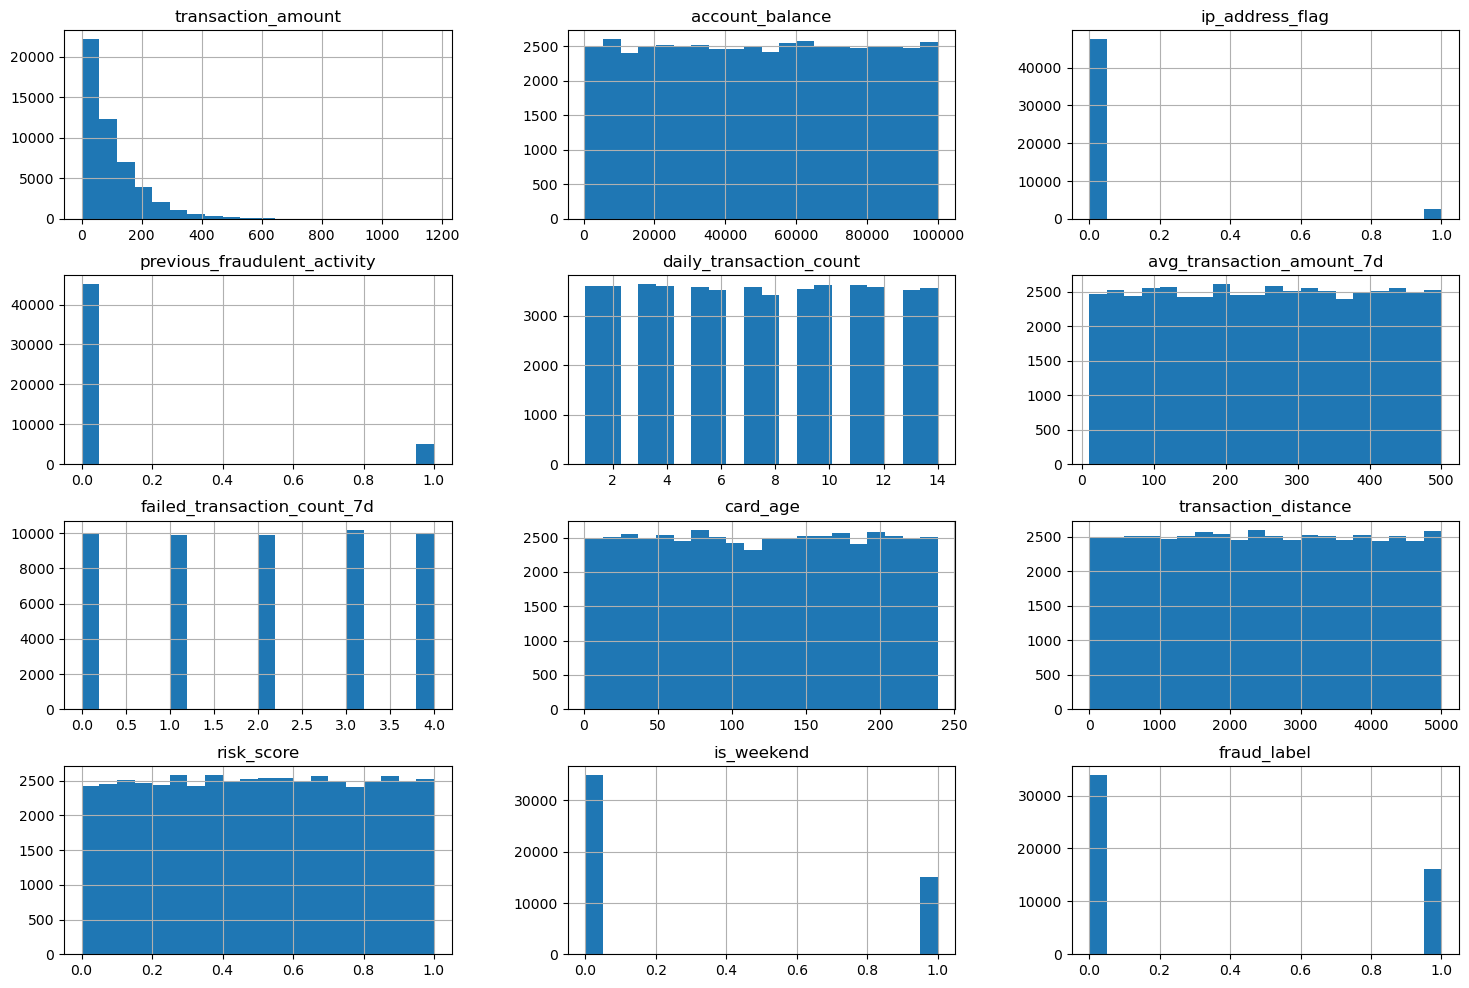

In [13]:
numeric_df.hist(figsize=(18, 12), bins=20)
plt.show()

### Spostrzeżenia
Widać, że zmienne daily_transaction_count i failed_transaction_count_7d przyjmują wartości z niewielkich zbiorów, jednak nie są to zmienne kategoryczne.

Zmienne ip_address_flag, is_weekend i fraud_label zgodnie z opisem danych są binarne.

Okazuje się, że zmienna previous_fraudulent_activity również.

Dominują rozkłady zbliżone do jednostajnych.

In [14]:
numeric_df['daily_transaction_count'].value_counts().sort_index()

daily_transaction_count
1     3598
2     3605
3     3634
4     3606
5     3582
6     3521
7     3574
8     3418
9     3538
10    3623
11    3620
12    3586
13    3524
14    3571
Name: count, dtype: int64

In [15]:
numeric_df['failed_transaction_count_7d'].value_counts().sort_index()

failed_transaction_count_7d
0    10014
1     9919
2     9897
3    10216
4     9954
Name: count, dtype: int64

### Boxplots

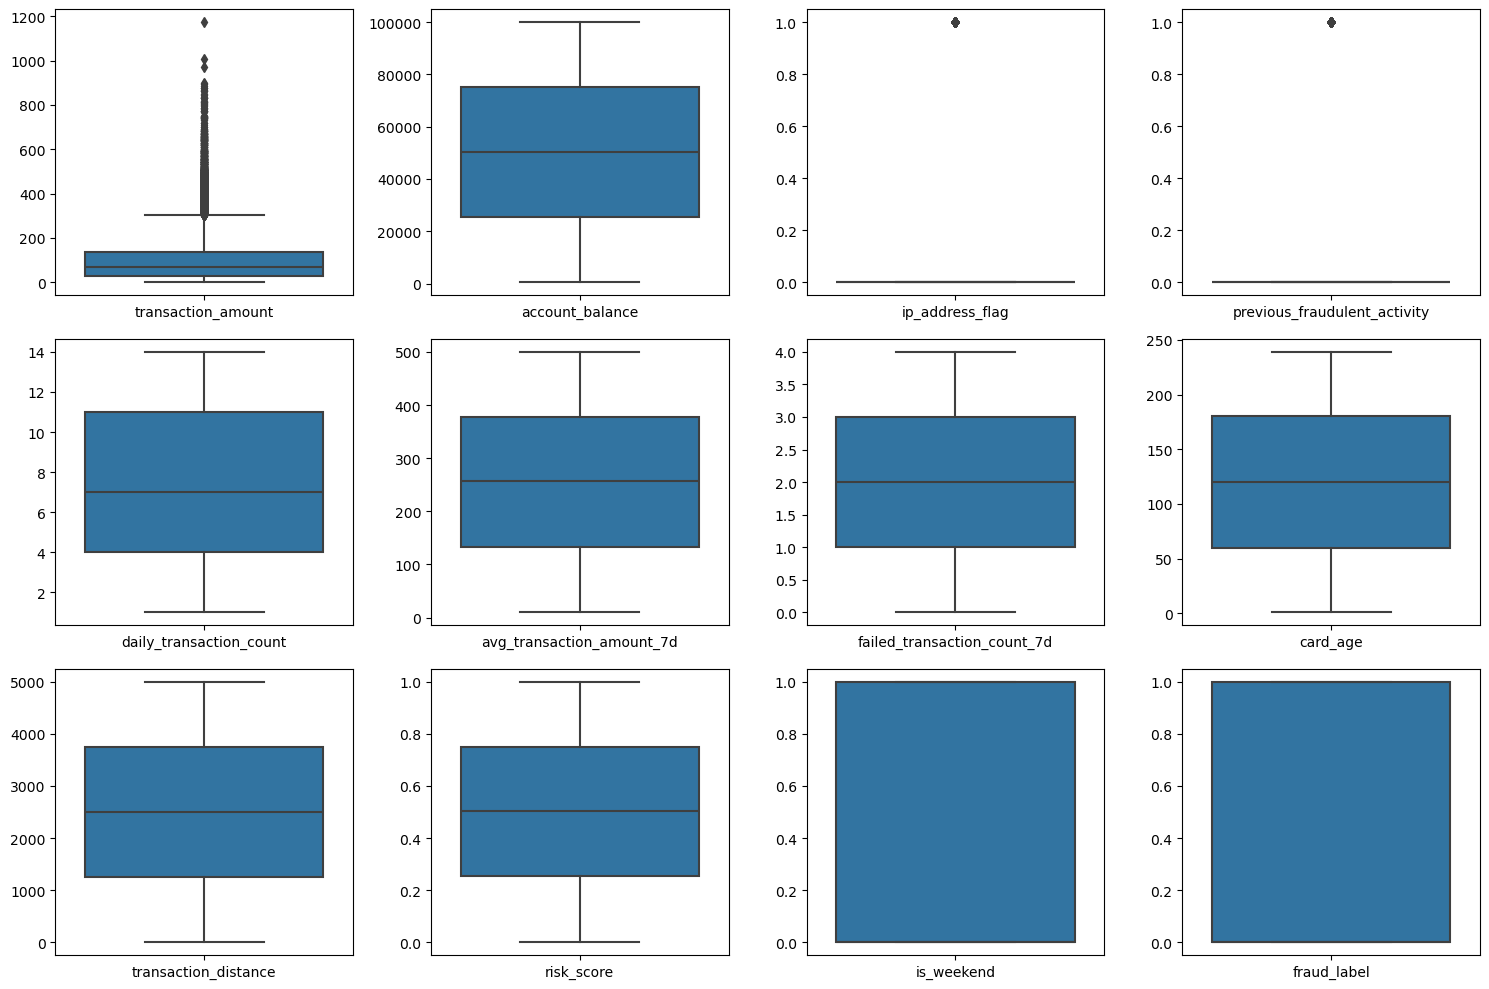

In [16]:
plt.figure(figsize=(15, 10))

for i, feature in enumerate(numeric_df, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(data=df1[feature])
    plt.xticks([0], [feature])

plt.tight_layout()
plt.show()

### Outliers
Widzimy, że transaction_amount zawiera wiele outlierów, czego spodziewaliśmy się już patrząc na histogram, gdyż przeważają transakcje poniżej 200$. 

Jednak transakcje na wysokie sumy pieniężne mogą być potencjalnie ważne w kontekście oszustw finansowych.

In [17]:
numeric_df1 = numeric_df.drop(['ip_address_flag', 'previous_fraudulent_activity', 'is_weekend', 'fraud_label'],axis='columns')

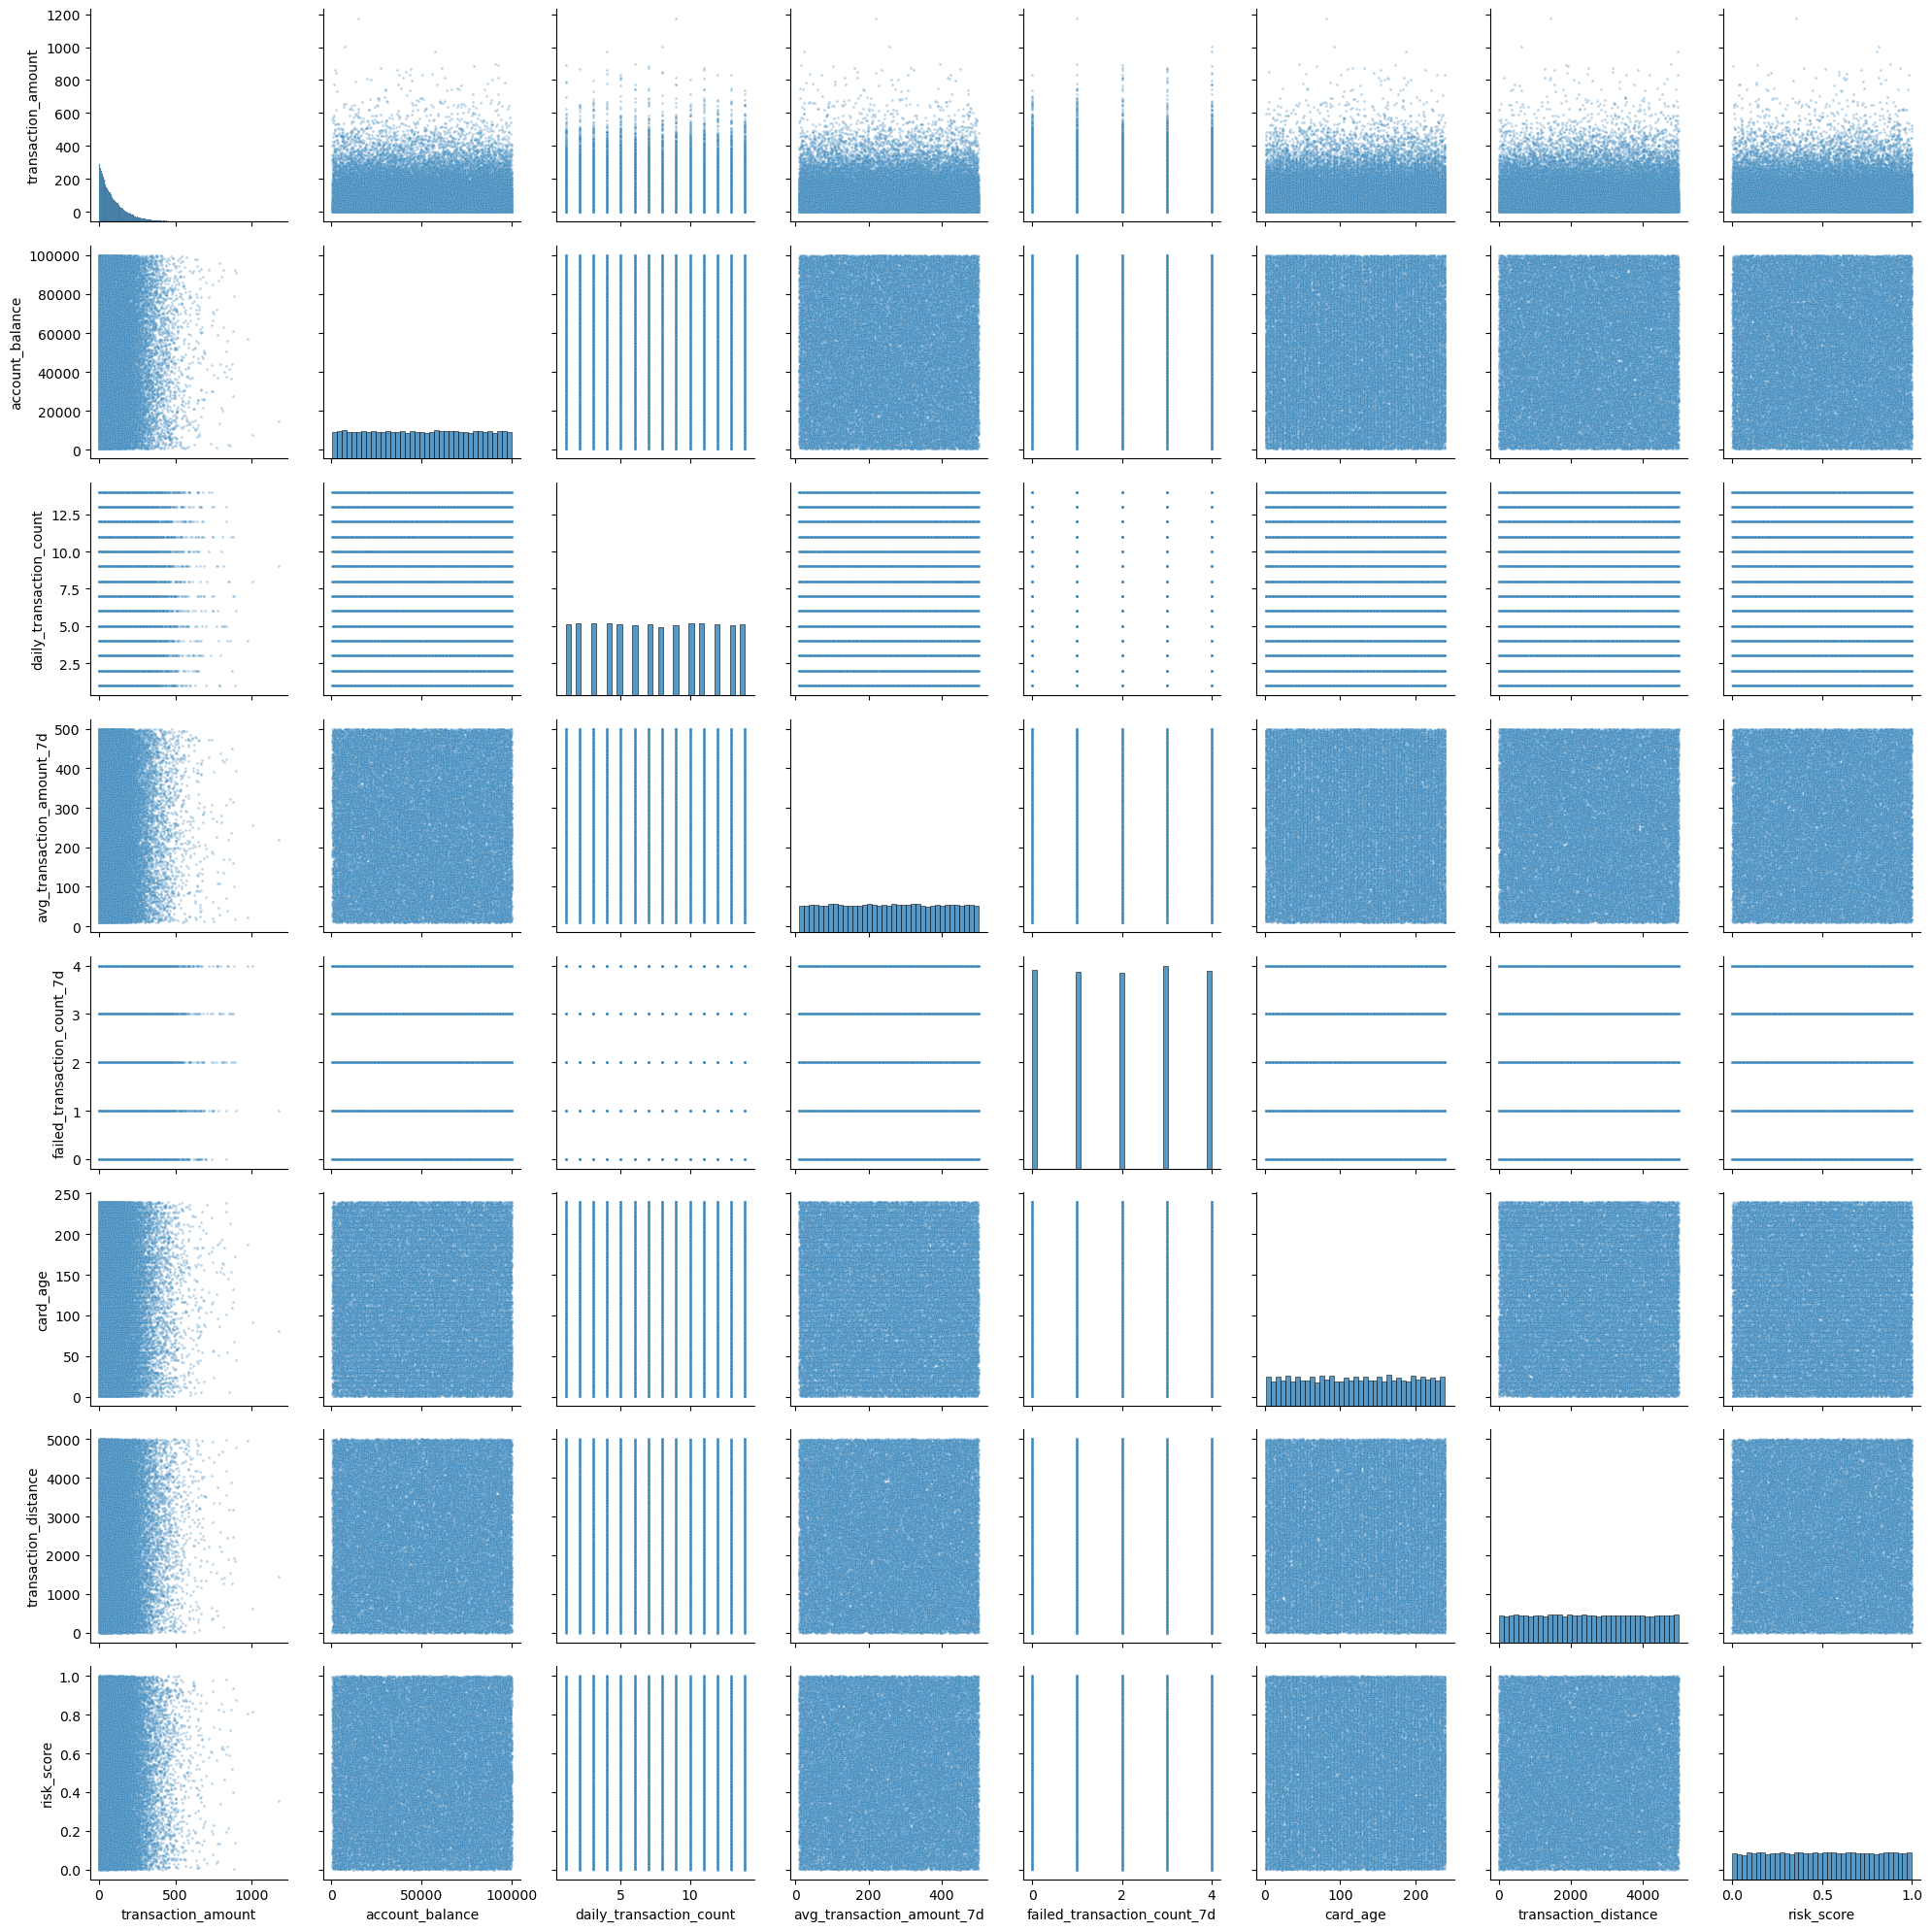

In [18]:
sns.pairplot(numeric_df1.iloc[:,:], plot_kws={'s': 4, 'alpha': 0.3})
plt.tight_layout()

### Zależności zmiennych numerycznych od binarnych

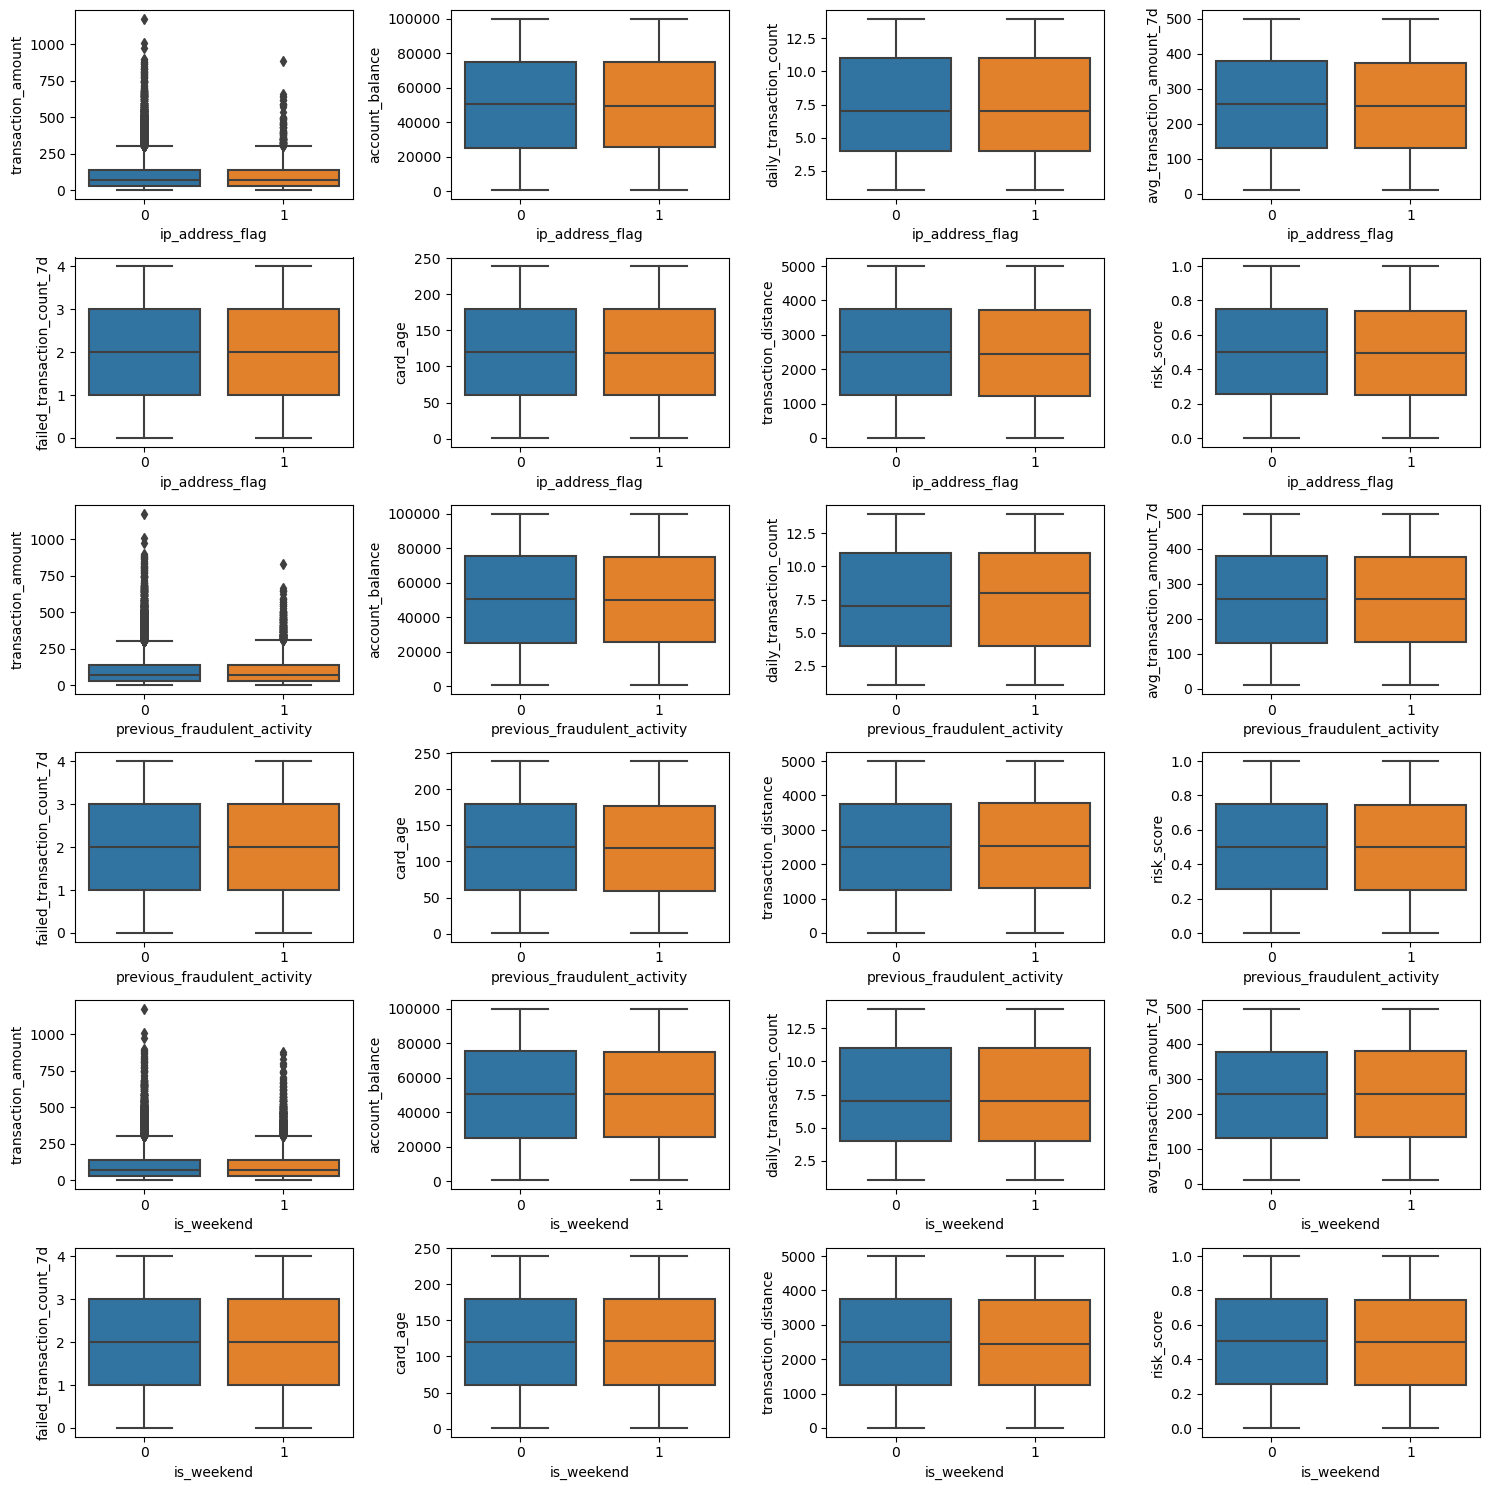

In [19]:
plt.figure(figsize=(15, 15))

for i, feature in enumerate(numeric_df1, 1):
    plt.subplot(6, 4, i)
    sns.boxplot(x='ip_address_flag', y=feature, data=numeric_df)

for i, feature in enumerate(numeric_df1, 1):
    plt.subplot(6, 4, i+8)
    sns.boxplot(x='previous_fraudulent_activity', y=feature, data=numeric_df)

for i, feature in enumerate(numeric_df1, 1):
    plt.subplot(6, 4, i+16)
    sns.boxplot(x='is_weekend', y=feature, data=numeric_df)
    
plt.tight_layout()
plt.show()

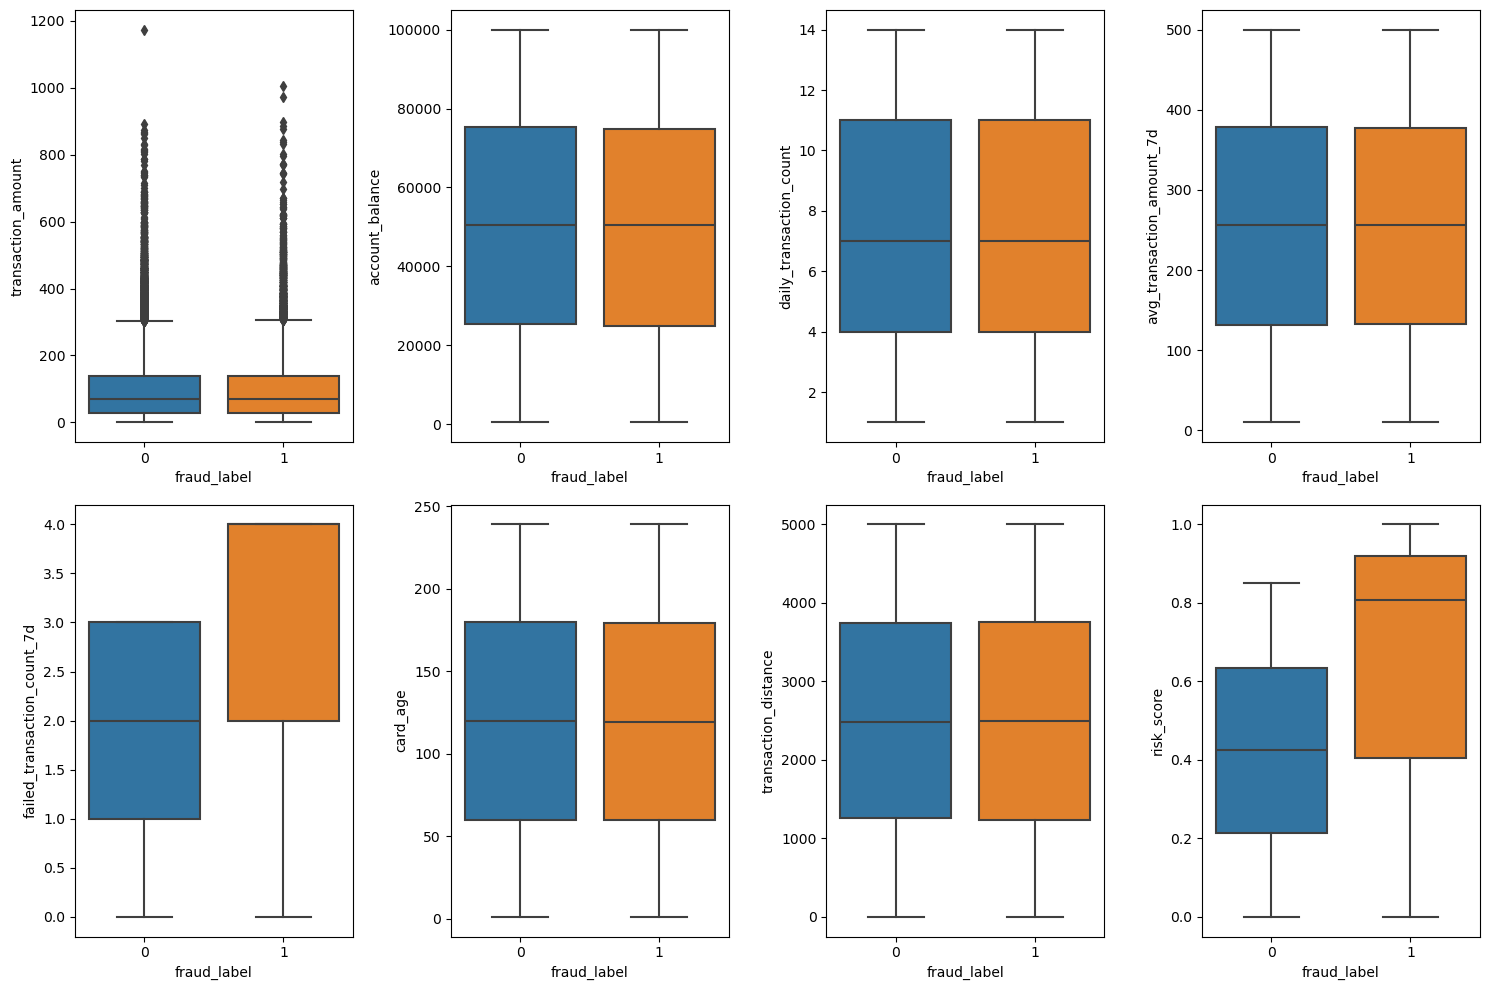

In [20]:
plt.figure(figsize=(15, 10))

for i, feature in enumerate(numeric_df1, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x='fraud_label', y=feature, data=numeric_df)

plt.tight_layout()
plt.show()

## Correlation heatmap for numerical features

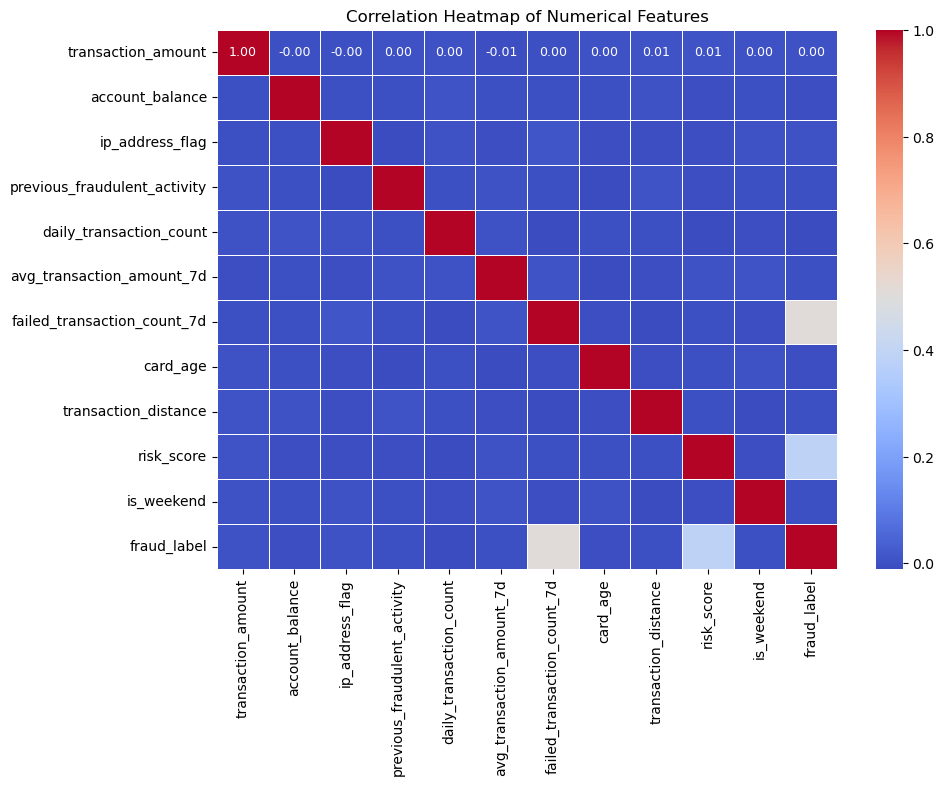

In [21]:
corr_matrix = numeric_df.corr()
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.4, annot_kws={"size": 9})
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

### Spostrzeżenia
Dzięki boxplotom i heatmapie zauważamy korelację naszej zmiennej objaśnianej ze zmiennymi failed_transaction_count_7d i risk_score.

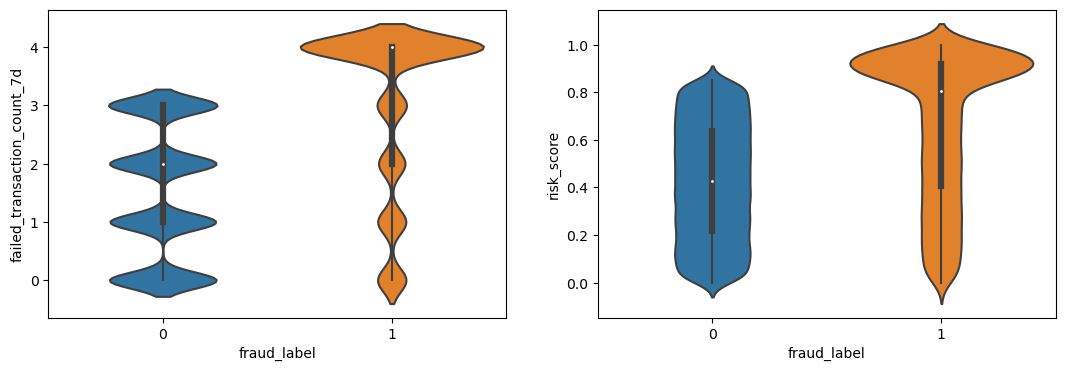

In [22]:
plt.figure(figsize=(13, 4))

plt.subplot(1, 2, 1)
sns.violinplot(x=df["fraud_label"], y=df["failed_transaction_count_7d"])

plt.subplot(1, 2, 2)
sns.violinplot(x=df["fraud_label"], y=df["risk_score"])

plt.show()

## Categorical variables

In [23]:
categorical_df1 = categorical_df.drop('timestamp',axis=1)
for col in categorical_df1:
    print(col, ":", categorical_df1[col].unique())

transaction_type : ['POS' 'Bank Transfer' 'Online' 'ATM Withdrawal']
device_type : ['Laptop' 'Mobile' 'Tablet']
location : ['Sydney' 'New York' 'Mumbai' 'Tokyo' 'London']
merchant_category : ['Travel' 'Clothing' 'Restaurants' 'Electronics' 'Groceries']
card_type : ['Amex' 'Mastercard' 'Visa' 'Discover']
authentication_method : ['Biometric' 'Password' 'OTP' 'PIN']


### Heatmaps based on contingency matrixes

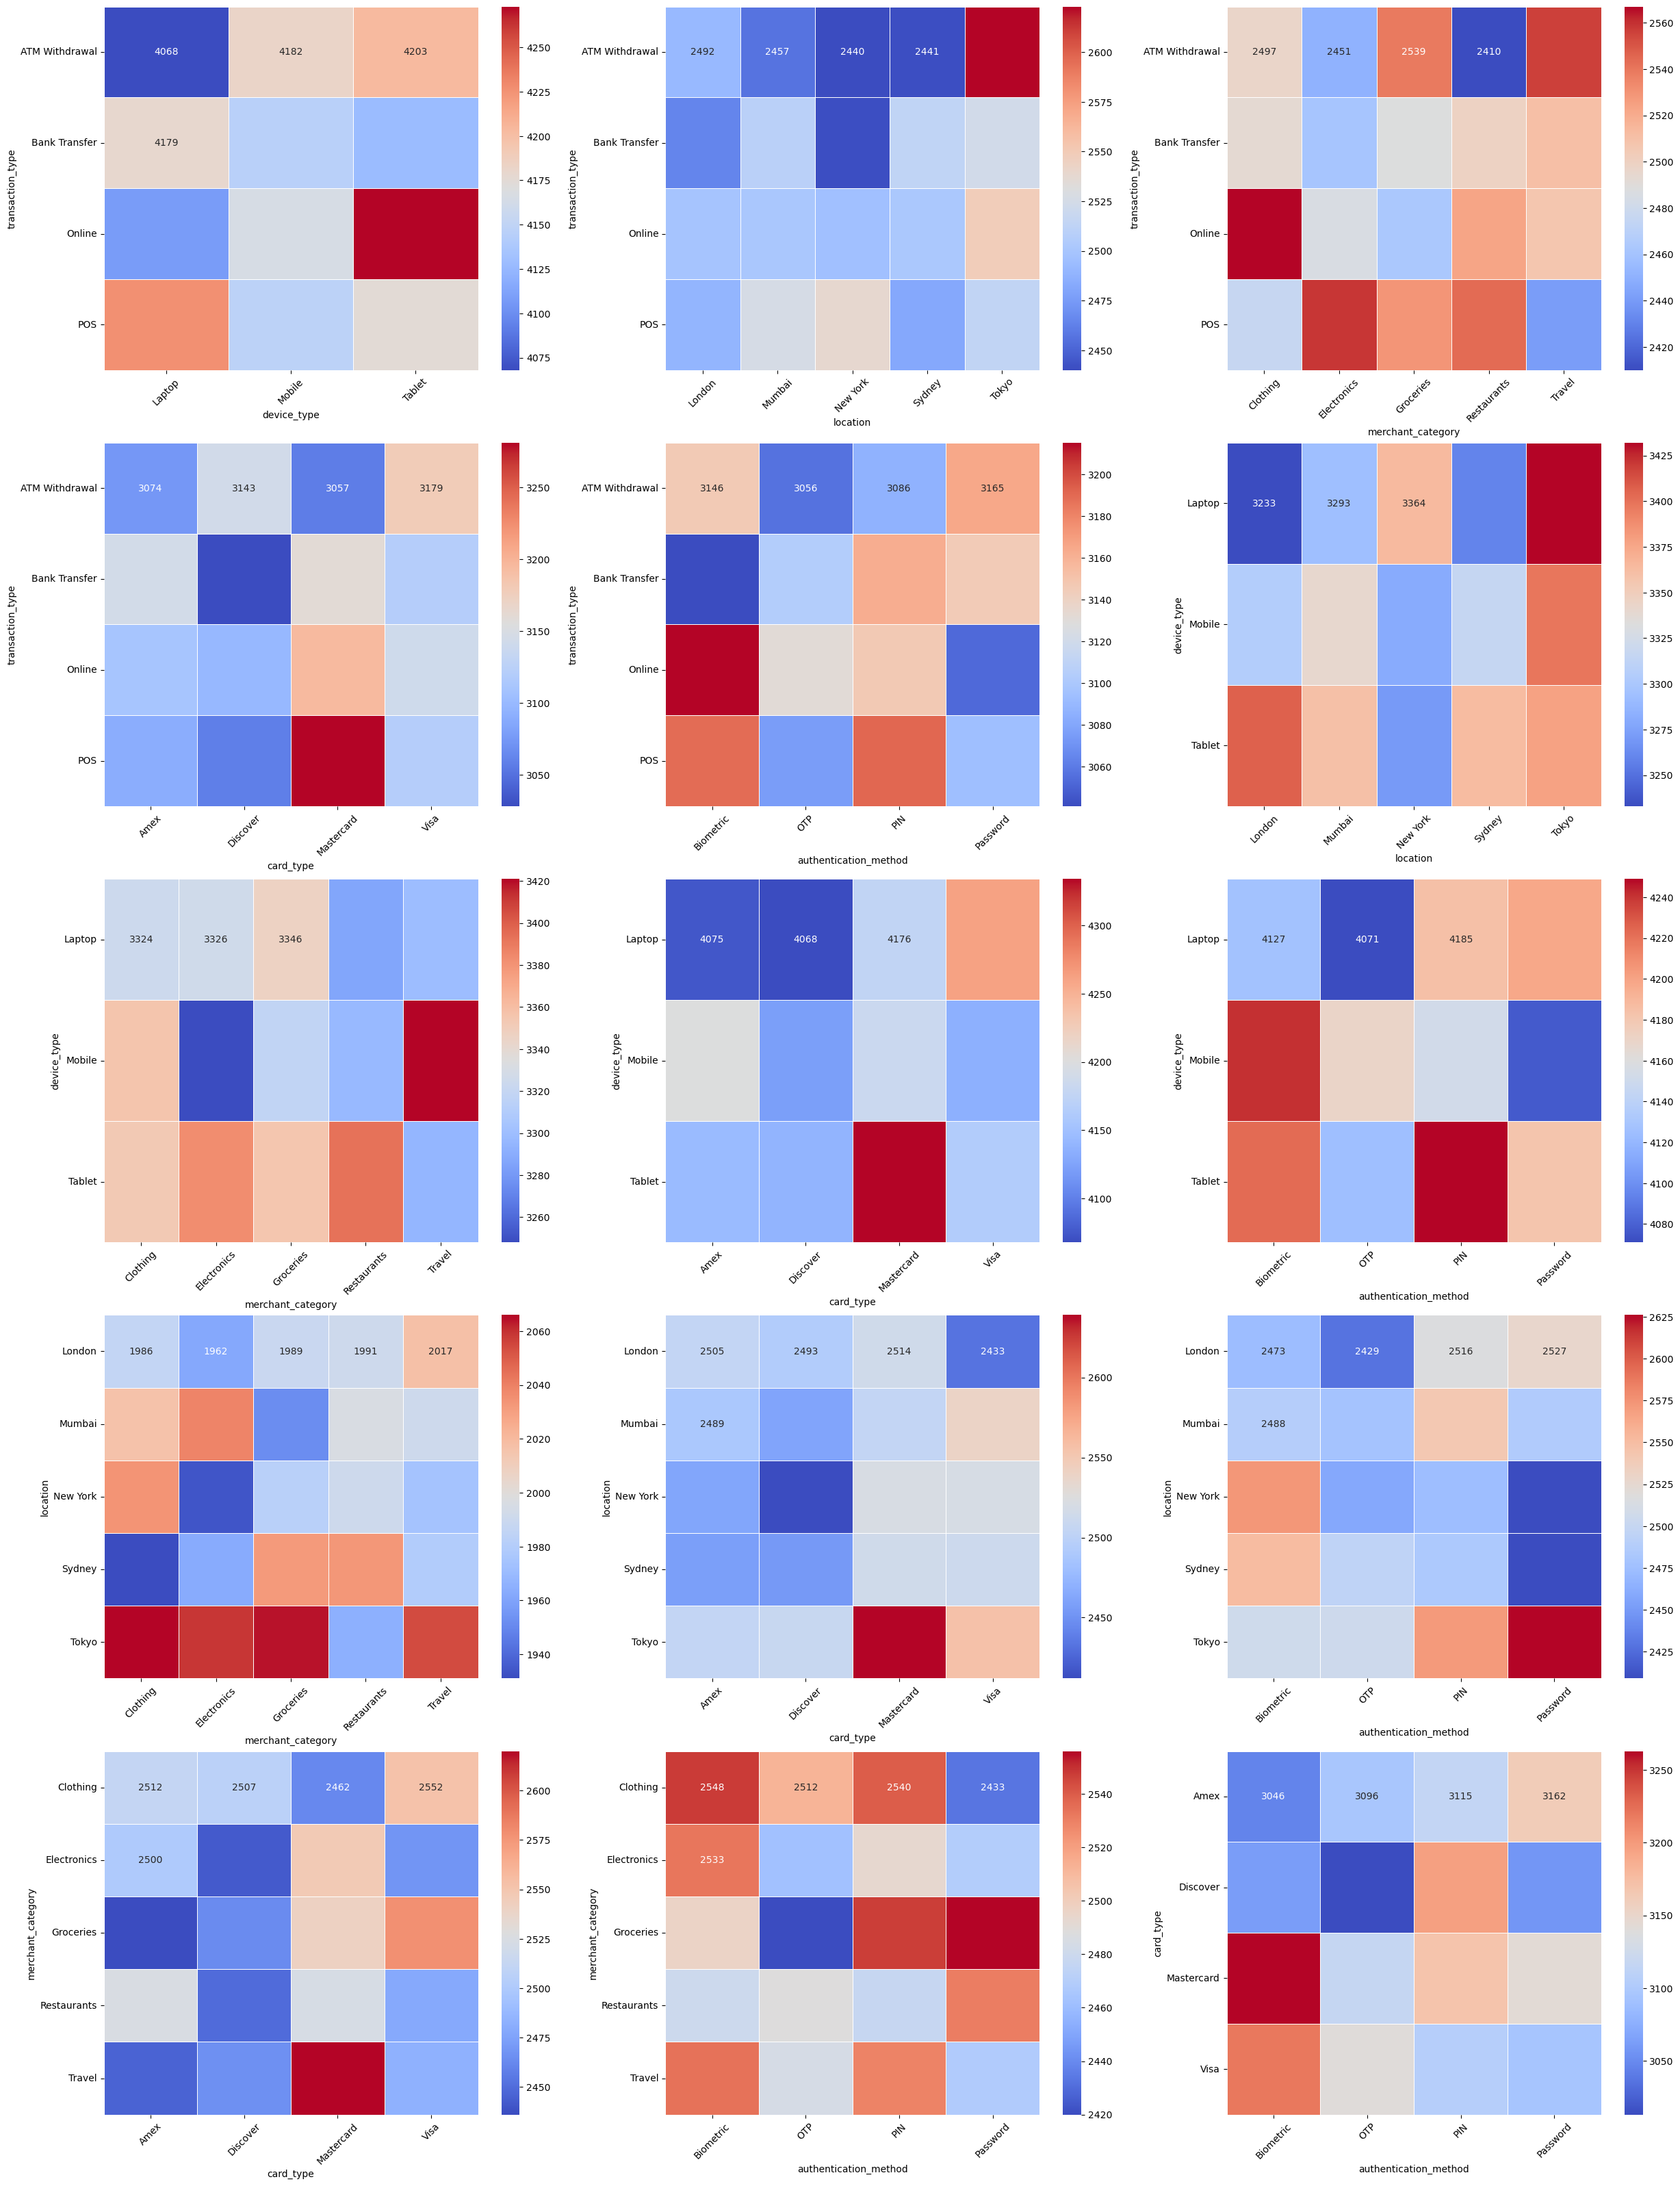

In [24]:
categorical_columns = ['transaction_type', 'device_type', 'location', 
                       'merchant_category', 'card_type', 'authentication_method']

k = 1
plt.figure(figsize=(30,40))
for i in range(len(categorical_columns)):
    for j in range(i + 1, len(categorical_columns)):
        col1 = categorical_columns[i]
        col2 = categorical_columns[j]
        
        contingency_table = pd.crosstab(categorical_df1[col1], categorical_df1[col2])

        plt.subplot(5, 3, k)
        k += 1
        sns.heatmap(contingency_table, cmap="coolwarm", annot=True, fmt="d", linewidths=0.5)
        plt.xlabel(col2)
        plt.ylabel(col1)
        plt.xticks(rotation=45)
        plt.yticks(rotation=0)

plt.tight_layout
plt.show()

### Barplots 

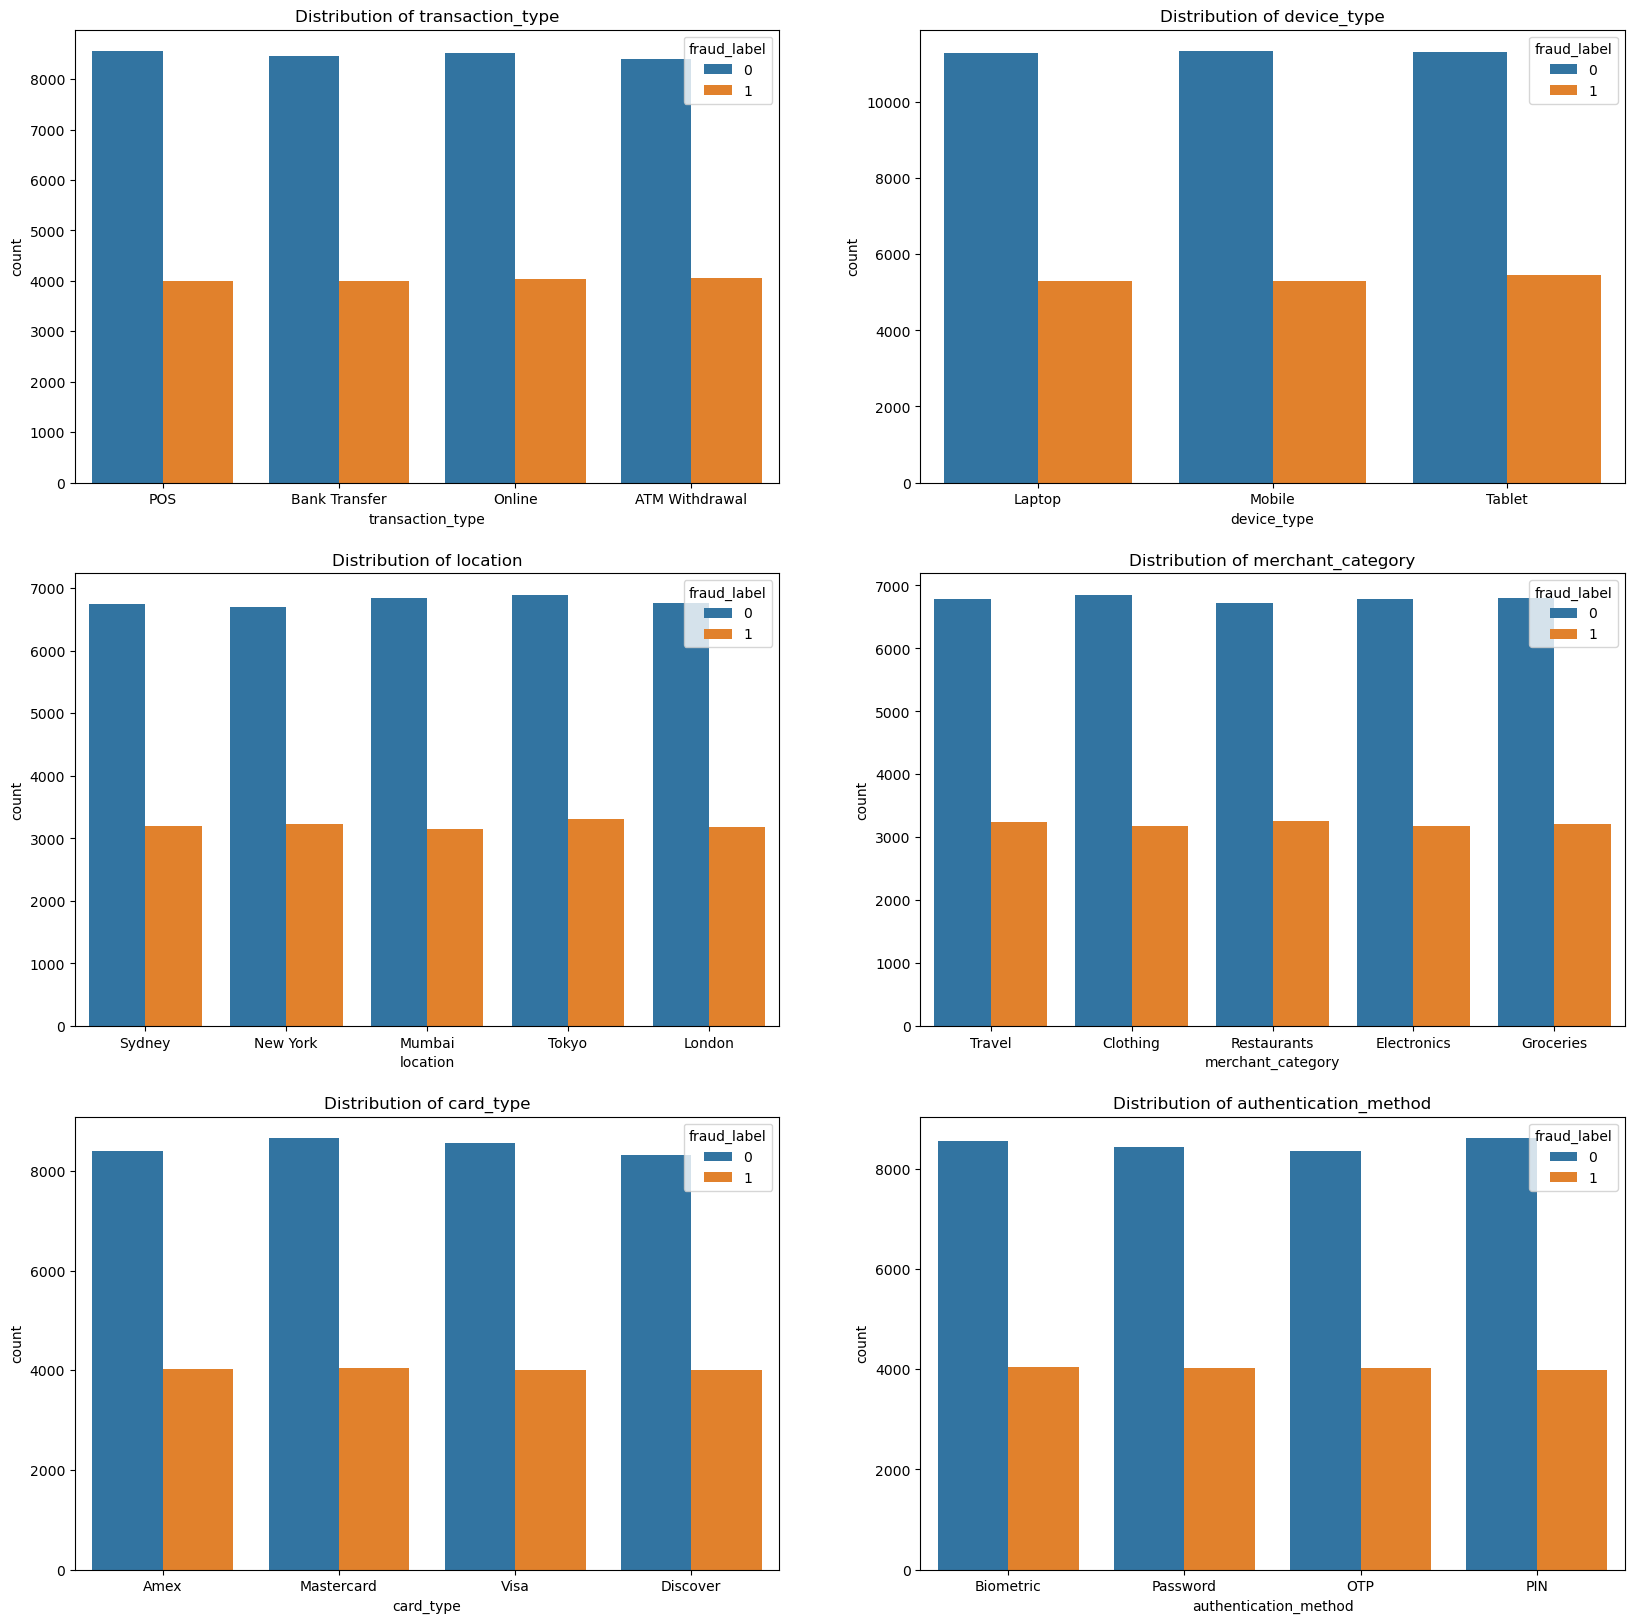

In [25]:
plt.figure(figsize=(20,20))
i=1
for col in categorical_df1:
    plt.subplot(3,2,i)
    i+=1
    plt.title(f"Distribution of {col}")
    sns.countplot(x=col, data=df, hue=df['fraud_label'].astype(str))
plt.show()

## Timestamp variable

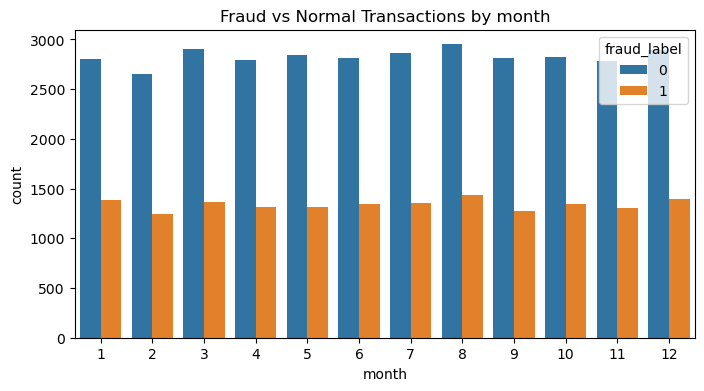

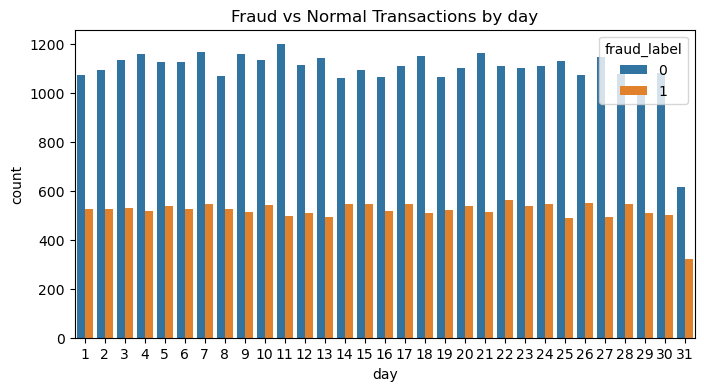

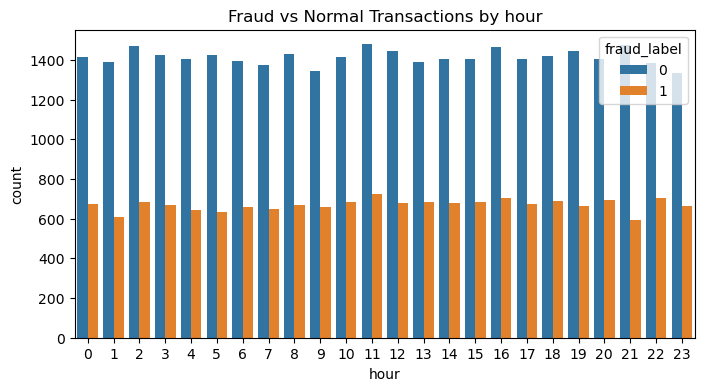

In [26]:
df1['month']=df1['timestamp'].dt.month
df1['day']=df1['timestamp'].dt.day
df1['hour']=df1['timestamp'].dt.hour

for col in ['month','day','hour']:
    plt.figure(figsize=(8,4))
    plt.title(f"Fraud vs Normal Transactions by {col}")
    sns.countplot(x=col, data=df1, hue=df1['fraud_label'].astype(str))
    plt.show()